In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# How are in-demand skills trending for Data Analysts?

### Group the Skills by Month


In [ ]:
# used job_title not job_title_short because the percentages at the end of Dec would be the same so I wouldn't be able to read the skills
df_DA_US = df[(df['job_title']== 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month 

# Explode job_skills column
df_DA_US_exploded = df_DA_US.explode('job_skills')


In [ ]:
df_DA_US['job_skills'].value_counts() 

### Pivot in Prep for Plotting


In [27]:
early_df_pivot = df_DA_US_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [28]:
early_df_pivot.loc['total']= early_df_pivot.sum()
early_df_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [17]:
early_df_pivot.loc['total'].sort_values(ascending=False).index

Index(['sql', 'excel', 'tableau', 'python', 'sas', 'r', 'power bi', 'word',
       'powerpoint', 'oracle',
       ...
       'google chat', 'openstack', 'theano', 'asp.net core', 'qt', 'couchdb',
       'capacitor', 'codecommit', 'chainer', 'msaccess'],
      dtype='object', name='job_skills', length=218)

In [29]:
df_DA_US_pivot = early_df_pivot[early_df_pivot.loc['total'].sort_values(ascending=False).index]

In [30]:
df_DA_US_pivot = df_DA_US_pivot.drop('total')
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


### Plot the Monthly Skill Counts


Text(0.5, 0, '2023')

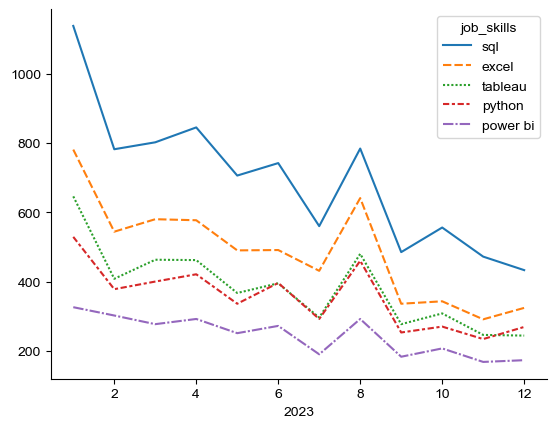

In [15]:
sns.lineplot(data=df_DA_US_pivot.iloc[:,:5])

sns.set_theme(style='ticks')
sns.despine()

plt.xlabel('2023')

### Calculate Percentage of Total Jobs `.div()`


In [ ]:
DA_total = df_DA_US.groupby('job_posted_month_no').size()
DA_total # Used the df_DA_US not the exploded one as it will be wrongly a massive number

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [32]:
df_DA_US_pivot_percent = df_DA_US_pivot.div(DA_total/100, axis=0).iloc[:,:5] # axis= 0 means divide row by row
df_DA_US_pivot_percent.reset_index(inplace=True)

In [33]:
df_DA_US_pivot_percent['job_posted_month'] = df_DA_US_pivot_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format= '%m').strftime('%b'))

In [34]:
df_DA_US_percent = df_DA_US_pivot_percent.drop(columns='job_posted_month_no')
df_DA_US_percent.set_index('job_posted_month', inplace=True)

In [35]:
df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi
job_posted_month,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542
Feb,60.903427,42.367601,31.775701,29.439252,23.520249
Mar,58.883994,42.584435,33.994126,29.368576,20.337739
Apr,61.723886,42.147553,33.747261,30.752374,21.329438
May,61.072664,42.387543,31.747405,29.065744,21.712803
Jun,61.474731,40.679370,32.725766,32.808616,22.535211
Jul,58.638743,45.130890,30.994764,30.575916,19.895288
Aug,55.445545,45.332390,33.946252,32.531825,20.650636
Sep,56.658879,39.252336,32.359813,29.556075,21.378505


### Plot Monthly Skill Demand


Text(0, 0.5, 'Liklihood of Job Postings')

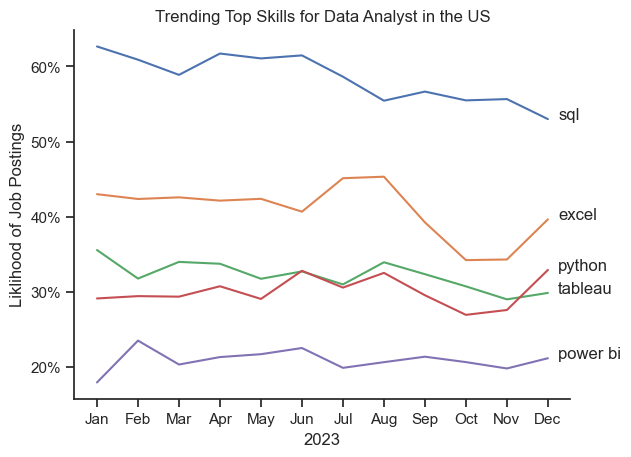

In [16]:
sns.lineplot(data=df_DA_US_percent, dashes=False, legend=False)
sns.despine()

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11+0.25 , df_DA_US_percent.iloc[-1,i], df_DA_US_percent.columns[i])
# 11 is the month Dec # -1 is also Dec but in the table # i is for the repetition 5 times one for each skill 
# df_DA_US_percent.iloc[-1].index[i] or df_DA_US_percent.columns[i] is the name of the line(column)


from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title('Trending Top Skills for Data Analyst in the US')
plt.xlabel('2023')
plt.ylabel('Liklihood of Job Postings')

### If I had used `job_title_short` instead of `job_title`


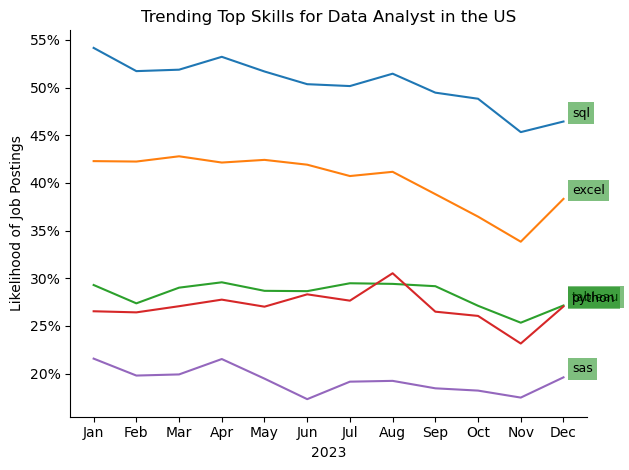

In [25]:
from matplotlib.ticker import PercentFormatter

# ... (your existing code to create df_DA_US_percent) ...

sns.lineplot(data=df_DA_US_percent, dashes=False, legend=False)
sns.despine()

# Improved annotation to prevent overlap
last_month_index = df_DA_US_percent.index[-1]  # Get the last month index (e.g., 'Dec')

for i in range(5):
    skill_name = df_DA_US_percent.columns[i]
    skill_value = df_DA_US_percent.loc[last_month_index, skill_name]  # Use .loc for label positioning

    # Adjust text position for better clarity. Consider adding small offsets to x and y.
    x_offset = 0.2  # Adjust this value to shift the text horizontally.
    y_offset = 0.2  # Adjust this to shift the text vertically.

    plt.text(11 + x_offset, skill_value + y_offset, skill_name, 
             ha='left', va='bottom',  # Horizontal and vertical alignment for better positioning
             fontsize=9,  # Adjust fontsize as needed
             bbox=dict(facecolor='green', alpha=0.5, edgecolor='none', pad=3)) # Add a box around the text

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title('Trending Top Skills for Data Analyst in the US')
plt.xlabel('2023')
plt.ylabel('Likelihood of Job Postings')  # Corrected y-axis label

plt.tight_layout() # Important: Adjust layout to prevent labels from being cut off
plt.show()